In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
sns.set_style("ticks")
from datetime import datetime
str(datetime.now())
import numpy as np
import scipy as sp
import os

In [2]:
rivers = {'ca': {'clair': ['Thames_R', 'Sydenham_R', 'Ruscom_R'],
                'eastern': ['Grand_R', 'Nanticoke_R', 'Lynn_R', 'Big_R'],
                'central': ['Big_Otter_R', 'Kettle_R'],
                'western': ['Turkey_R', 'Canard_R']},
          'us': {'clair': ['Clinton_R', 'Belle_R', 'Black_R_MI'], 
                 'eastern': ['Cattaraugus_R', 'Buffalo_R'],
                'central': ['Sandusky_R', 'Black_OH_R', 'Vermilion_R', 'Rocky_R', 'Cuyahoga_R', 
                            'Chagrin_R', 'Grand_OH_R', 'Conneaut_R'],
                'western': ['Rouge_R', 'Huron_MI_R', 'Raisin_R', 'Maumee_R', 'Portage_R']},
        'StClair':['St_R']}

In [3]:
river_name = 'Thames_R'

In [4]:
canadian_rivers_path = '/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada Chloride/'

In [5]:
canadian_rivers_path

'/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada Chloride/'

In [6]:
canadian_rivers = pd.DataFrame({}, columns=['Date', 'Month'])
for dirpath, dirnames, filenames in os.walk(canadian_rivers_path+'Rivers'):
    for filenames in zip([f for f in filenames if f.endswith("iver_Cl_Daily.csv")], [f for f in filenames if f.endswith("iver_Cl_Sample.csv")]):
        f1, f2= filenames
        print(dirpath)
        EGRET_Daily = pd.read_csv(dirpath+"/"+f1)
        EGRET_Sample = pd.read_csv(dirpath+"/"+f2)
        EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
        EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000
        EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
        EGRET_Daily=EGRET_Daily.groupby([pd.to_datetime(EGRET_Daily.Date).dt.year, 'Month']
                   ).mean()[['FluxYearMTA']].reset_index()
        river_name = dirpath.split("/")[8]
        EGRET_Daily[river_name] = EGRET_Daily['FluxYearMTA']
        river = EGRET_Daily[['Date', 'Month', river_name]]
        canadian_rivers = pd.merge(canadian_rivers,river, on=['Date','Month'], how='outer')

/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada Chloride/Rivers/Niagara_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada Chloride/Rivers/Grand_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada Chloride/Rivers/Lynn_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada Chloride/Rivers/St_Clair_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada Chloride/Rivers/Canard_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada Chloride/Rivers/Big_Otter_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada Chloride/Rivers/Big_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada Chloride/Rivers/Nanticoke_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada Chloride/Rivers/Turkey_R/EGRET

In [7]:
canadian_rivers

,Date,Month,Niagara_R,Grand_R,Lynn_R,St_Clair_R,Canard_R,Big_Otter_R,Big_R,Nanticoke_R,Turkey_R,Sydenham_R,Kettle_R,Thames_R,Ruscom_R
0,1996,1,3.242307e+06,148232.598890,4189.635900,NaN,2426.933933,11825.609696,6717.904230,4150.329381,4979.094578,NaN,15455.100181,NaN,3516.783446
1,1996,2,3.099811e+06,152206.345663,3860.232207,NaN,2781.689927,8587.781718,5814.530342,3907.240582,10688.176226,NaN,15443.070254,NaN,3739.899793
2,1996,3,3.145641e+06,157581.784368,3707.803931,NaN,3133.138603,9618.382555,6568.493142,3820.149310,7624.126481,NaN,9912.486698,NaN,3424.930596
3,1996,4,3.211676e+06,160971.281355,4437.128400,NaN,2428.561739,17919.526693,8806.403272,6924.580517,8618.601757,NaN,20282.509954,NaN,3157.013277
4,1996,5,3.558528e+06,131818.246330,4415.362457,NaN,1367.755908,16432.354131,8141.107011,6530.712890,3738.344552,NaN,16198.626126,NaN,1522.881450
5,1996,6,3.673512e+06,110976.602203,4019.363510,NaN,530.258226,9685.498786,5890.629874,6619.541718,2270.742172,NaN,4541.749369,NaN,1408.353322
6,1996,7,3.698893e+06,79245.144502,2697.424412,NaN,169.344152,4098.702413,3123.851145,1110.420588,1219.407287,NaN,2963.006353,NaN,434.897623
7,1996,8,3.733421e+06,63172.321679,2203.870804,NaN,229.150165,2621.234938,2655.458060,372.311201,294.450841,NaN,1251.086608,NaN,118.919885
8,1996,9,3.891219e+06,83773.192247,3352.215164,NaN,616.345944,9554.457293,5429.520281,3588.835762,3103.253234,NaN,11927.874975,NaN,2078.827765
9,1996,10,3.945853e+06,96605.778800,3391.694752,NaN,812.592012,8771.158625,6641.327267,2567.339573,1406.945328,NaN,14888.825096,NaN,1662.788411


In [8]:
us_rivers_path = '/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/'

In [9]:
us_rivers = pd.DataFrame({}, columns=['Date', 'Month'])
for dirpath, dirnames, filenames in os.walk(us_rivers_path+'Rivers'):
    for filenames in zip([f for f in filenames if f.endswith("iver_Cl_Daily.csv")], [f for f in filenames if f.endswith("iver_Cl_Sample.csv")]):
        f1, f2= filenames
        print(dirpath)
        EGRET_Daily = pd.read_csv(dirpath+"/"+f1)
        EGRET_Sample = pd.read_csv(dirpath+"/"+f2)
        EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
        EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000
        EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
        EGRET_Daily=EGRET_Daily.groupby([pd.to_datetime(EGRET_Daily.Date).dt.year, 'Month']
                   ).mean()[['FluxYearMTA']].reset_index()
        river_name = dirpath.split("/")[8]
        EGRET_Daily[river_name] = EGRET_Daily['FluxYearMTA']
        river = EGRET_Daily[['Date', 'Month', river_name]]
        us_rivers = pd.merge(us_rivers,river, on=['Date','Month'], how='outer')
        

/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Rouge_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Portage_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Buffalo_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Raisin_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Grand_OH_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Cattaraugus_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Conneaut_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Chagrin_R/EGRET Result/Cl
/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US Chloride/Rivers/Belle_R/EGRET Result/Cl
/Users/imarkelo/gi

In [10]:
all_rivers = pd.merge(us_rivers, canadian_rivers, on=['Date','Month'], how='outer')

In [11]:
all_rivers[all_rivers.columns[2:]] = all_rivers[all_rivers.columns[2:]]/1000

In [14]:
all_rivers.groupby(all_rivers.Date).mean().to_csv('rivers_cl_kta_annual.csv')

In [140]:
all_rivers.to_csv('rivers_cl_kta.csv')

In [19]:
all_rivers[all_rivers.Date>2002]

,Date,Month,Rouge_R,Portage_R,Buffalo_R,Raisin_R,Grand_OH_R,Cattaraugus_R,Conneaut_R,Chagrin_R,...,St_Clair_R,Canard_R,Big_Otter_R,Big_R,Nanticoke_R,Turkey_R,Sydenham_R,Kettle_R,Thames_R,Ruscom_R
84,2003,1,2.349650,10.692633,31.014750,13.476543,22.795206,13.348823,3.506275,30.986398,...,1043.739115,0.625136,2.637825,2.972566,0.698701,0.821413,2.588657,1.128432,56.395534,0.424900
85,2003,2,3.082673,7.060507,28.505063,13.639346,32.279168,13.650639,4.925510,53.858260,...,963.012525,0.622778,2.396219,2.705785,0.462466,0.663172,3.702398,3.357857,58.288863,0.263563
86,2003,3,18.446609,32.222195,79.123871,47.822999,66.453052,37.093673,7.576677,60.776164,...,1043.031312,4.449221,12.819931,6.204932,3.636077,5.925206,44.372547,12.148080,139.870315,3.095749
87,2003,4,29.242585,21.320147,31.963392,42.468161,37.321587,20.391667,4.408581,37.840909,...,1104.627222,2.463094,8.883071,6.134254,2.456314,3.205604,32.737228,8.983817,137.049433,1.392079
88,2003,5,24.543836,25.164995,31.583288,45.820150,34.852391,15.817776,4.073514,40.139346,...,1144.787262,2.983064,7.145667,5.393240,2.932408,3.455764,20.049178,7.207515,122.440361,1.506204
89,2003,6,15.068360,11.466527,18.977666,17.471927,25.290578,12.384887,5.355560,20.801594,...,1182.176046,1.299744,4.886646,3.927164,1.581892,1.269826,10.378179,2.721777,57.554640,0.993814
90,2003,7,3.276837,8.172056,8.578339,7.310764,18.510395,8.362765,1.968182,14.596815,...,1211.267123,0.355625,3.651182,3.099083,0.570266,0.537081,2.610809,1.116091,30.794307,0.374087
91,2003,8,6.116567,8.795634,9.647989,8.569376,5.971036,8.814789,0.577269,7.219881,...,1215.622747,0.804270,3.588815,3.077435,0.636308,0.703787,1.647152,0.712243,31.349324,0.603806
92,2003,9,6.426641,3.293129,7.147922,10.200399,30.930458,6.783643,2.301012,13.694366,...,1177.450679,0.534534,3.896984,2.987562,0.644344,1.065352,1.898732,0.964395,28.363441,0.770347
93,2003,10,4.496910,2.944769,20.855831,15.105720,29.499840,10.318998,3.670468,10.930711,...,1164.481626,0.636692,6.391513,5.123916,1.623405,0.749797,7.479975,1.912055,60.731383,1.082063


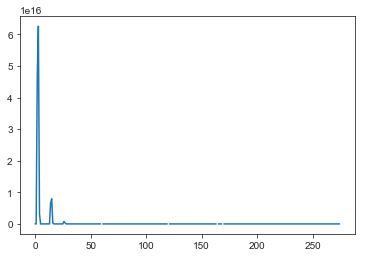

In [16]:
all_rivers['Belle_R'].plot()

In [142]:
all_rivers.columns

Index(['Date', 'Month', 'Rouge_R', 'Portage_R', 'Buffalo_R', 'Raisin_R',
       'Grand_OH_R', 'Cattaraugus_R', 'Conneaut_R', 'Chagrin_R', 'Belle_R',
       'Cuyahoga_R', 'Black_R_MI', 'Sandusky_R', 'Huron_OH_R', 'Clinton_R',
       'Huron_MI_R', 'Rocky_R', 'Black_OH_R', 'Detroit_R', 'Maumee_R',
       'Vermilion_R', 'Niagara_R', 'Grand_R', 'Lynn_R', 'St_Clair_R',
       'Canard_R', 'Big_Otter_R', 'Big_R', 'Nanticoke_R', 'Turkey_R',
       'Sydenham_R', 'Kettle_R', 'Thames_R', 'Ruscom_R'],
      dtype='object')